In [9]:
import os
import pickle
from variational.exponential_family import GenericMeanFieldNormalDistribution, NormalDistribution, MeanFieldNormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

flipped_predictors = get_dataset(dataset="Sonar")
N, dim = flipped_predictors.shape

# Gaussian Prior
my_prior_covariance = 25 * jnp.identity(dim)
my_prior_covariance = my_prior_covariance.at[0, 0].set(400)
my_prior_log_density = NormalDistribution(jnp.zeros(dim), my_prior_covariance).log_density
tgt_log_density = jax.vmap(get_tgt_log_density(flipped_predictors, my_prior_log_density), in_axes=(None, 0))

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericMeanFieldNormalDistribution(dimension=dim)


In [10]:
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))

Text(0.5, 1.0, 'heuristic_gaussian_Nicolas_10_10000_Seq1u1_[0 0]_loss.pkl')

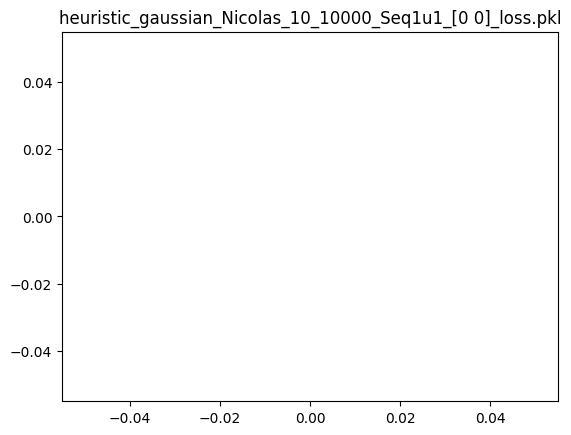

In [12]:
idx=0
plt.plot(lossesPKLs[idx][1:])
plt.title(lossesPKL_titles[idx])


In [3]:
lossesPKL_titles

['heuristic_gaussian_Nicolas_1000_100000_Seq1_[0 0]_loss_agarder.pkl',
 'testpourlossasuppr_heuristic_gaussian_Nicolas_1000_10000_Seq1_[0 0]_loss.pkl',
 'heuristic_gaussian_Nicolas_1000_10000_Seq1_[0 0]_loss.pkl',
 'gaussianMeanField_Nicolas_1000_10000_Seq2_[0 4].pkl_loss.pkl']

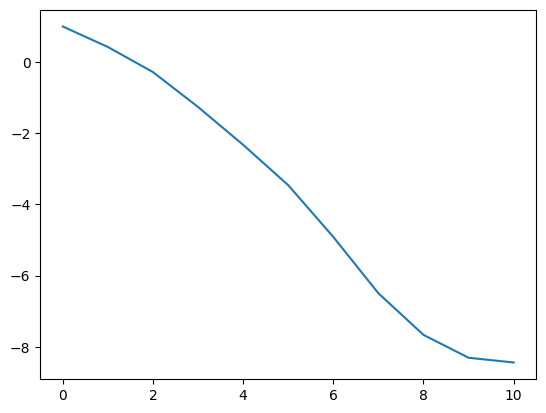

In [8]:
plt.plot(PKLs[0]['res'][0][:,-1])

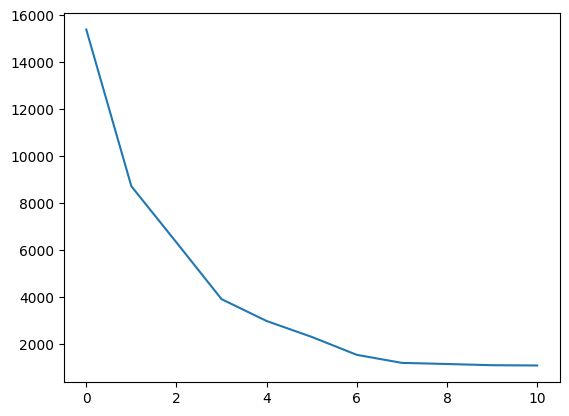

In [15]:
ecolors = ["red", "red", "red"]
colors = ["orange", "gray", "blue", "black"]
labels = ["sch. 1 (without Alg. 4)"]
start = 50
end = 1001
for idx in range(1):
    plt.errorbar(x=np.arange(start, end),y=lossesPKLs[idx][:,start:end].mean(axis=0), 
             yerr=lossesPKLs[idx][:,start:end].std(axis=0), ecolor=ecolors[idx], errorevery=10, color=colors[idx],
                elinewidth=0.5, label=labels[idx])
plt.xticks([50, 250, 500, 750, 1000])
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("mean_std_sonar_mfg_starting_from_50.pdf")

In [ ]:
np.savetxt('loss_1e3_1e3_heuristic_mfg_sonar.csv', np.array([np.arange(1, 1000+1), lossesPKLs[2][1:]]).T, delimiter=",")
np.savetxt('loss_1e3_1e3_Seq2_mfg_sonar.csv', np.array([np.arange(1, 1000+1), lossesPKLs[-1][1:]]).T, delimiter=",")